In [1]:
import pandas as pd
from matplotlib import pyplot
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [326]:
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names=names)
classes={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
dataset['class'].replace(classes,inplace=True)

dataset=dataset.sample(frac=1)
# class
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50
# dtype: int64
# dataset.groupby('class').size()

In [23]:
classes={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
classes['Iris-setosa']

1

In [327]:
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

(150, 5)
     sepal-length  sepal-width  petal-length  petal-width  class
35            5.0          3.2           1.2          0.2      0
67            5.8          2.7           4.1          1.0      1
48            5.3          3.7           1.5          0.2      0
107           7.3          2.9           6.3          1.8      2
110           6.5          3.2           5.1          2.0      2
29            4.7          3.2           1.6          0.2      0
101           5.8          2.7           5.1          1.9      2
130           7.4          2.8           6.1          1.9      2
27            5.2          3.5           1.5          0.2      0
143           6.8          3.2           5.9          2.3      2
34            4.9          3.1           1.5          0.1      0
99            5.7          2.8           4.1          1.3      1
51            6.4          3.2           4.5          1.5      1
42            4.4          3.2           1.3          0.2      0
88            5.

In [281]:
aa=pd.DataFrame([])
aa['sepal-length']=dataset['sepal-length']
aa['sepal-width']=dataset['sepal-width']
aa['petal-length']=dataset['petal-length']
aa['petal-width']=dataset['petal-width']

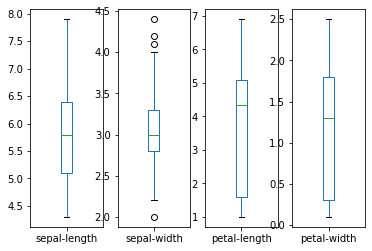

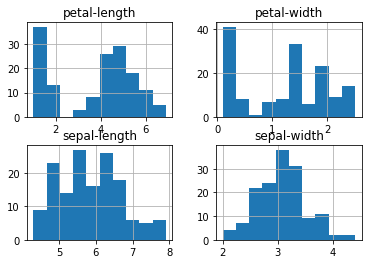

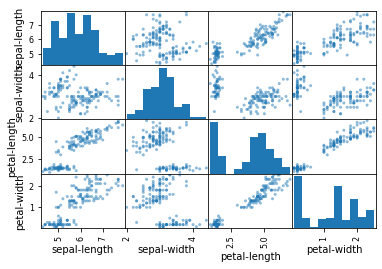

In [328]:
# box and whisker plots
aa.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()
# histograms
aa.hist()
pyplot.show()
pd.plotting.scatter_matrix(aa)
pyplot.show()

In [368]:


array = dataset.to_numpy()
# print(array)
x=array[0:125,0:4]
# y=pd.get_dummies(array[0:125,4]).to_numpy()#One-hot encodding
y=array[0:125,4]
x=x.astype(np.float32)#for pytorch
xtrain = torch.from_numpy(x).to(torch.float32)
ytrain = torch.from_numpy(y).to(torch.long)
x=array[125:,0:4]
y=pd.get_dummies(array[125:,4]).to_numpy()#One-hot encodding
x=x.astype(np.float32)
xtest = torch.from_numpy(x).to(torch.float32)
ytest = torch.from_numpy(y).to(torch.long)
ytrain
ytest

tensor([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0]])

In [383]:
torch.manual_seed(2)
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(4,16)
#         self.fc2=nn.Linear(8,8)
        self.fc3=nn.Linear(16,3)
    
    def forward(self, x):
        x=F.sigmoid(self.fc1(x))
#         x=F.relu(self.fc2(x))
#         print(1," ",x)
#         x=F.sigmoid(self.fc2(x))
        x=F.sigmoid(self.fc3(x))
#         print(2," ",x)
        x=F.softmax(x)
#         print(x)
#         print(3," ",x)
        return x
        
net=Net()     
optimizer = optim.Adam(net.parameters(), lr=0.02)

In [88]:
# params = list(net.parameters())
# print(len(params))
# print(params[0].size())

In [384]:
def training(xtrain,ytrain):
    criterion = nn.CrossEntropyLoss()
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(xtrain)
#         print(output,j)
    loss = criterion(output, ytrain)
#     tloss.append(loss)
#     print(loss)
    loss.backward()
    optimizer.step()
    

#     # print(x)
#     tloss=[]
#     for i,j in zip(xtrain,ytrain):
#     #     print(i)
#     #     out=net(i)
#         criterion = nn.CrossEntropyLoss()
#         optimizer.zero_grad()   # zero the gradient buffers
#         output = net(i)
#         print(output.view(-1),j.view(-1))
#         loss = criterion(output.view(-1), j.view(-1))
#         tloss.append(loss)
#         loss.backward()
#         optimizer.step()
#     print( (sum(tloss) / len(tloss)).data)

In [385]:

for i in range(100):
    training(xtrain,ytrain)
    
    with torch.no_grad():
        correct = 0
        total = 0
        for i,j in zip(xtrain,ytrain):
            pred=net(i)
#             print(pred.round(),j)
            total += 1
            correct += (pred.round() == j).sum().item()
        print( 100 * correct / total)

    


/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
92.8
88.0
82.4
76.0
71.2
68.8
64.8
64.8
64.8
64.8
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
72.0
78.4
80.8
80.8
83.2
83.2
84.0
85.6
85.6
87.2
88.0
88.8
89.6
90.4
90.4
90.4
91.2
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0


In [361]:
xtrain,ytrain

(tensor([[5.000000000000000, 3.200000047683716, 1.200000047683716,
          0.200000002980232],
         [5.800000190734863, 2.700000047683716, 4.099999904632568,
          1.000000000000000],
         [5.300000190734863, 3.700000047683716, 1.500000000000000,
          0.200000002980232],
         [7.300000190734863, 2.900000095367432, 6.300000190734863,
          1.799999952316284],
         [6.500000000000000, 3.200000047683716, 5.099999904632568,
          2.000000000000000],
         [4.699999809265137, 3.200000047683716, 1.600000023841858,
          0.200000002980232],
         [5.800000190734863, 2.700000047683716, 5.099999904632568,
          1.899999976158142],
         [7.400000095367432, 2.799999952316284, 6.099999904632568,
          1.899999976158142],
         [5.199999809265137, 3.500000000000000, 1.500000000000000,
          0.200000002980232],
         [6.800000190734863, 3.200000047683716, 5.900000095367432,
          2.299999952316284],
         [4.900000095367432, 3

In [373]:
with torch.no_grad():
        correct = 0
        total = 0
        for i,j in zip(xtest,ytest):
            pred=net(i)
#             print(pred.round(),j)
            total += j.size(0)
            correct += (pred.round() == j).sum().item()
        print( 100 * correct / total)

92.0


/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [374]:
torch.set_printoptions(precision=15)
with torch.no_grad():
        prediction=net(xtest)
        for i,j in zip(prediction,ytest):
            print(i.data,j.data)

tensor([0.157994106411934, 0.428676873445511, 0.413329064846039]) tensor([0, 0, 1])
tensor([0.566291987895966, 0.219722181558609, 0.213985890150070]) tensor([1, 0, 0])
tensor([0.189937442541122, 0.504243671894073, 0.305818945169449]) tensor([0, 1, 0])
tensor([0.157499283552170, 0.427454739809036, 0.415046006441116]) tensor([0, 0, 1])
tensor([0.201833665370941, 0.527749001979828, 0.270417451858521]) tensor([0, 1, 0])
tensor([0.159680813550949, 0.432842731475830, 0.407476484775543]) tensor([0, 0, 1])
tensor([0.201398208737373, 0.526763796806335, 0.271837949752808]) tensor([0, 1, 0])
tensor([0.248753026127815, 0.531999051570892, 0.219247922301292]) tensor([0, 1, 0])
tensor([0.161810785531998, 0.438096553087234, 0.400092720985413]) tensor([0, 0, 1])
tensor([0.566384434700012, 0.219634130597115, 0.213981360197067]) tensor([1, 0, 0])
tensor([0.158592462539673, 0.430151134729385, 0.411256372928619]) tensor([0, 0, 1])
tensor([0.204057589173317, 0.530849993228912, 0.265092462301254]) tensor([0,

/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
